In [23]:
import numpy as np
import matplotlib.pyplot as plt
c = 4.2     # Kj/kgK
m = 3.8 # kg

data = np.loadtxt("data.csv", delimiter=",", skiprows=1)

t = data[:, 0] * 60 + data[:, 1]    # s
T_h = data[:, 2]    # C
T_c = data[:, 3]    # C

A = data[:, 8]
P = (A[15])/(t[15])*3600 # kW

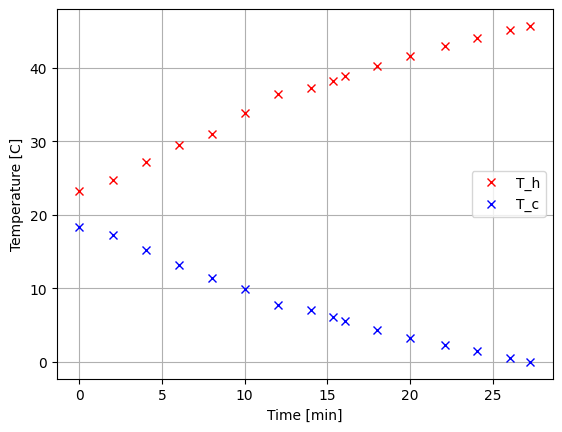

In [24]:
t_min = t/60
plt.plot(t_min, T_h, "x", label='T_h', color="red")
plt.plot(t_min, T_c, "x", label='T_c', color="blue")

plt.xlabel("Time [min]")
plt.ylabel("Temperature [C]")
# Error to small to be noticeable
plt.grid()
plt.legend(loc="center right")
plt.show()

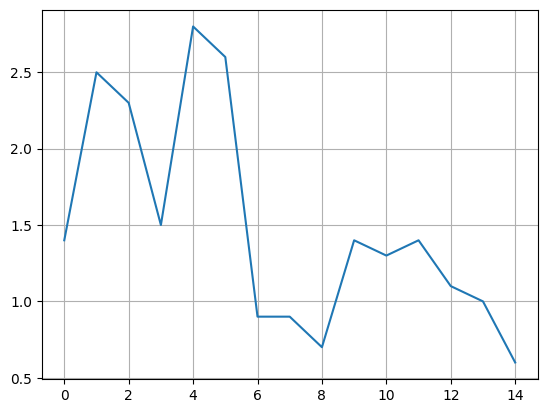

In [36]:
dT = np.zeros(len(t)-1)
dt = np.zeros(len(t)-1)
e_E = np.zeros(len(t)-1)

for i in range(1, len(t)):
    dT[i-1] = T_h[i] - T_h[i-1]
    dt[i-1] = t[i] - t[i-1]  

plt.plot(dT)
e_E = c*m*dT/(P*dt) # KJ/(kg * K) * K / (s*kJ/s) = dimensjonsløs

# plt.plot(e_E, "x", label='e_E', color="green")
plt.grid()
plt.show()


In [26]:
sigma_m = 0.1
sigma_T = 0.05
sigma_dT = 0.071
sigma_A = 5e-3
sigma_t = 0


e_e =np.empty(len(t))
for i in range(1, len(t)):
     e_m = sigma_m / m
     e_dT = sigma_dT / (T_h[i] - T_h[i-1])

     e_e[i] = np.sqrt(e_m**2 + e_dT**2 + e_P**2)


# e_e = e_e[2:]
#plt.errorbar(t_min[1:], e_E, yerr=e_e[1:], fmt="x", label='e_E', color="green")
#plt.show()


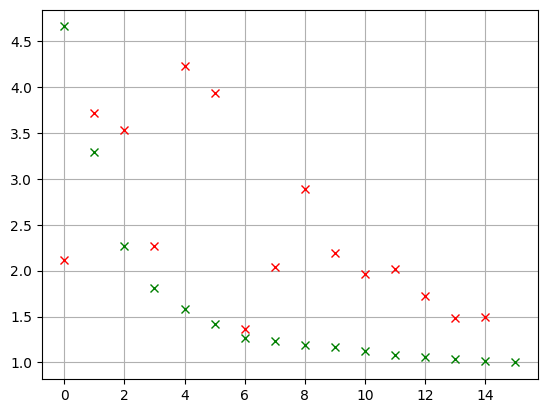

In [27]:
e_c = T_h/(np.abs(T_h - T_c))

plt.plot(e_c, "x", label='e_c', color="green")
plt.plot(e_E, "x", label='e_E', color="red")
plt.grid()
plt.show()

In [28]:
print(dT/dt)

[0.01166667 0.0204918  0.01949153 0.0125     0.02333333 0.02166667
 0.0075     0.01125    0.01590909 0.01206897 0.01083333 0.01111111
 0.00948276 0.00819672 0.00821918]
